In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
import warnings
warnings.filterwarnings("ignore")

In [61]:
X_train = pd.read_csv('x_train_regression.csv')
X_test = pd.read_csv('x_test_regression.csv')

In [62]:
X_train.head()

,holiday_No Holiday,functioning_day_Yes,visibility,seasons,count_transformed,temp_transformed,humidity_transformed,wind_speed_transformed,dew_point_temp_transformed,solar_radiation_transformed,rainfall_transformed,snowfall_transformed
0,0.232023,0.182547,-2.224167,-1.352171,5.891644,-0.286178,0.276142,-1.092839,-0.067368,0.752075,-0.136067,-0.174664
1,0.232023,0.182547,0.746259,1.337332,7.967627,1.196356,0.039601,0.659133,1.032952,0.316296,-0.136067,-0.174664
2,0.232023,0.182547,0.740082,1.337332,6.634633,1.290660,0.039601,-0.014932,1.107516,0.362320,-0.035242,-0.174664
3,0.232023,0.182547,0.539604,-0.455670,6.692084,0.248342,-1.531718,-1.092839,-0.392335,1.861174,-0.136067,-0.174664
4,0.232023,0.182547,0.746259,0.440831,7.382746,0.044573,-0.468587,-0.600006,-0.074611,-0.658677,-0.136067,-0.174664


In [63]:
X_test.head()

,holiday_No Holiday,functioning_day_Yes,visibility,seasons,count_transformed,temp_transformed,humidity_transformed,wind_speed_transformed,dew_point_temp_transformed,solar_radiation_transformed,rainfall_transformed,snowfall_transformed
0,0.232023,0.182547,0.746259,-0.455670,5.913503,-0.076897,0.761373,-0.404221,0.258037,-0.658677,-0.136067,-0.174664
1,0.232023,0.182547,0.746259,0.440831,6.445720,0.751837,0.967749,-0.698186,0.956860,-0.658677,-0.136067,-0.174664
2,0.232023,0.182547,-0.230644,-1.352171,5.620401,-0.695882,0.413050,2.444316,-0.337456,-0.623575,-0.136067,0.765314
3,0.232023,0.182547,0.746259,-1.352171,5.370638,-2.115017,-0.259291,1.040281,-1.807721,-0.658677,-0.136067,-0.174664
4,0.232023,0.182547,0.248567,1.337332,6.545350,1.515911,0.087781,1.793991,1.297657,1.614016,-0.136067,-0.174664


In [64]:
y_train = X_train['count_transformed']
y_test = X_test['count_transformed']

In [65]:
X_train = X_train.drop(columns=['count_transformed'])
X_test = X_test.drop(columns=['count_transformed'])

# Model Building

### Plan:

In [66]:

# Multiple linear regression
from sklearn.linear_model import LinearRegression

# Ridge regression
from sklearn.linear_model import Ridge

# Lasso regression
from sklearn.linear_model import Lasso

# Polynomial regression
from sklearn.preprocessing import PolynomialFeatures

# SVR
from sklearn.svm import SVR

# Decision Tree regression
from sklearn.tree import DecisionTreeRegressor

# Random Forest regression
from sklearn.ensemble import RandomForestRegressor

# to evaluate the model
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

### Multiple Linear Regression

In [68]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [69]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = lm.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = lm.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 284809
train rmse: 533
train r2: 0.3141130232985305

test mse: 302133
test rmse: 549
test r2: 0.2780954398734091



Text(0.5, 1.0, 'Evaluation of Linear Regression Predictions')

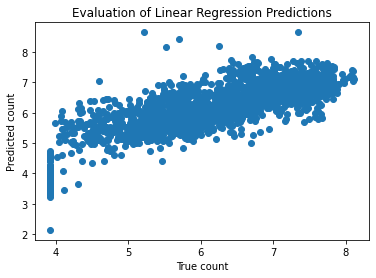

In [70]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, lm.predict(X_test))
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.title('Evaluation of Linear Regression Predictions')

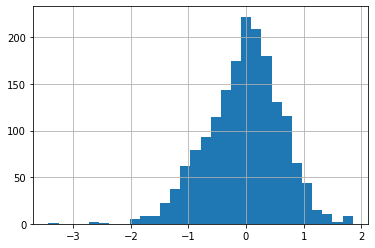

In [71]:
# evaluate the distribution of the errors:
# they should be fairly normally distributed

errors = y_test - lm.predict(X_test)
errors.hist(bins=30)

In [72]:
X_train.columns

Index(['holiday_No Holiday', 'functioning_day_Yes', 'visibility', 'seasons',
       'temp_transformed', 'humidity_transformed', 'wind_speed_transformed',
       'dew_point_temp_transformed', 'solar_radiation_transformed',
       'rainfall_transformed', 'snowfall_transformed'],
      dtype='object')

Text(0.5, 1.0, 'Feature Importance')

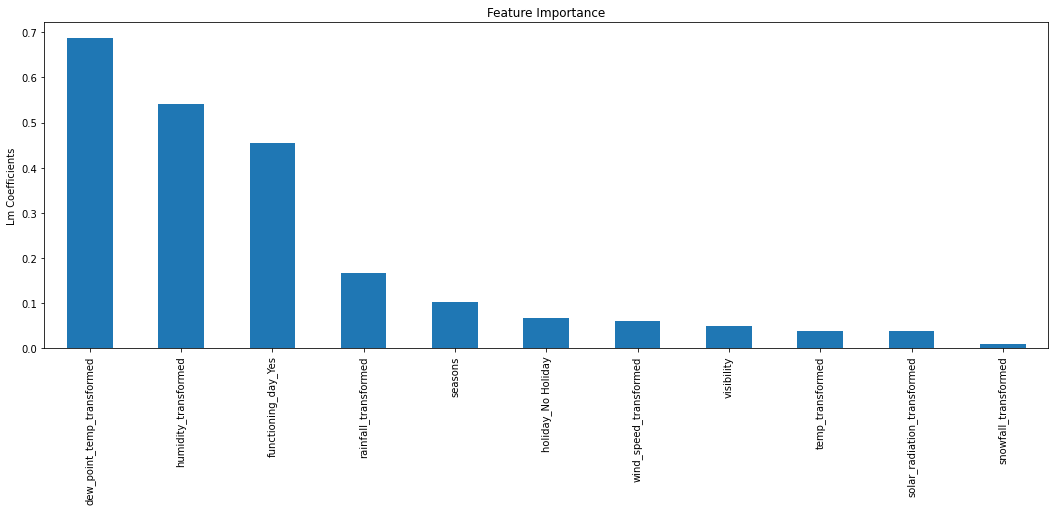

In [73]:
# Finally, just for fun, let's look at the feature importance

importance = pd.Series(np.abs(lm.coef_.ravel()))
importance.index = ['holiday_No Holiday', 'functioning_day_Yes', 'visibility', 'seasons',
       'temp_transformed', 'humidity_transformed', 'wind_speed_transformed',
       'dew_point_temp_transformed', 'solar_radiation_transformed',
       'rainfall_transformed', 'snowfall_transformed']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))
plt.ylabel('Lm Coefficients')
plt.title('Feature Importance')

### Regularization: Lasso regression

In [74]:
l1 = Lasso(alpha=0.005, random_state=0)

l1.fit(X_train, y_train)

Lasso(alpha=0.005, random_state=0)

In [75]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = l1.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = l1.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 268771
train rmse: 518
train r2: 0.3527376849662849

test mse: 276785
test rmse: 526
test r2: 0.33866035797405836



Text(0.5, 1.0, 'Evaluation of Lasso Regression Predictions')

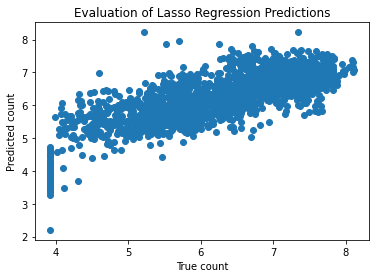

In [76]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, l1.predict(X_test))
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.title('Evaluation of Lasso Regression Predictions')

### Regularizaton: Ridge Regression

In [77]:
l2 = Ridge(alpha=0.005, random_state=0)
l2.fit(X_train, y_train)

Ridge(alpha=0.005, random_state=0)

In [78]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = l2.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = l2.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 284803
train rmse: 533
train r2: 0.31412791033588827

test mse: 302124
test rmse: 549
test r2: 0.27811735024048234



Text(0.5, 1.0, 'Evaluation of Rdige Regression Predictions')

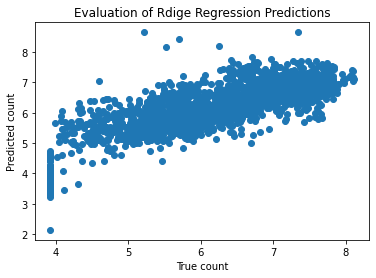

In [79]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, l2.predict(X_test))
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.title('Evaluation of Rdige Regression Predictions')

In [80]:
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

SVR()

In [81]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = svr.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = svr.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 147183
train rmse: 383
train r2: 0.6455490175099433

test mse: 149027
test rmse: 386
test r2: 0.6439195714445495



Text(0.5, 1.0, 'Evaluation of SVR Predictions')

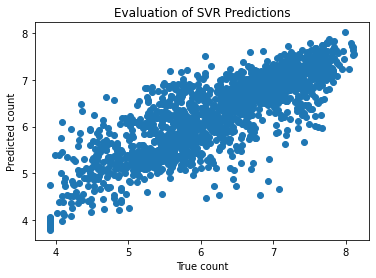

In [82]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, svr.predict(X_test))
plt.xlabel('True count')
plt.ylabel('Predicted count')
plt.title('Evaluation of SVR Predictions')

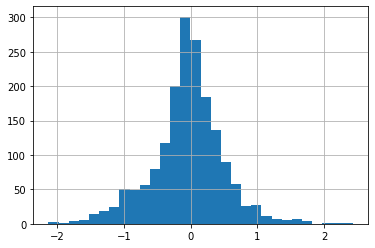

In [83]:
# evaluate the distribution of the errors:
# they should be fairly normally distributed

errors = y_test - svr.predict(X_test)
errors.hist(bins=30)

### Decision Tree Regression

In [84]:
dt = DecisionTreeRegressor(random_state=0)
dt.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [85]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = dt.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = dt.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 127
train rmse: 11
train r2: 0.9996939299549149

test mse: 219102
test rmse: 468
test r2: 0.47648700923057463



Text(0.5, 1.0, 'Evaluation of Decision Tree Regression Predictions')

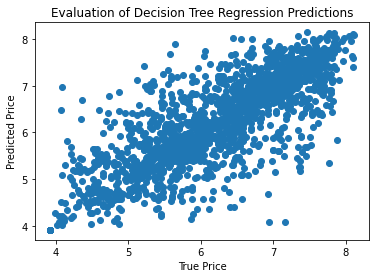

In [86]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, dt.predict(X_test))
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Evaluation of Decision Tree Regression Predictions')

### Random Forest

In [87]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

RandomForestRegressor()

In [88]:
# evaluate the model

# transform target and predictions (log) back to original

# we evaluate using the mean squared error,
# the root of the mean squared error, and r2

# make predictions for train set
pred = rf.predict(X_train)

# determine mse and rmse
print('train mse: {}'.format(int(
    mean_squared_error(np.exp(y_train), np.exp(pred)))))
print('train rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_train), np.exp(pred))))))
print('train r2: {}'.format(
    r2_score(np.exp(y_train), np.exp(pred))))
print()

# make predictions for test set
pred = rf.predict(X_test)

# determine mse and rmse
print('test mse: {}'.format(int(
    mean_squared_error(np.exp(y_test), np.exp(pred)))))
print('test rmse: {}'.format(int(
    sqrt(mean_squared_error(np.exp(y_test), np.exp(pred))))))
print('test r2: {}'.format(
    r2_score(np.exp(y_test), np.exp(pred))))
print()

train mse: 22128
train rmse: 148
train r2: 0.9467088469585204

test mse: 128452
test rmse: 358
test r2: 0.693080083022984



Text(0.5, 1.0, 'Evaluation of Random Forest Regression Predictions')

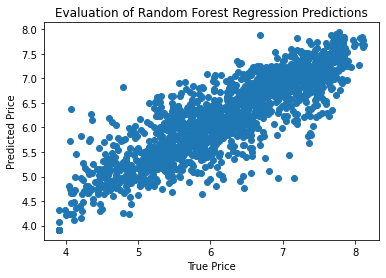

In [89]:
# evaluate the predictions respect to the real values
plt.scatter(y_test, rf.predict(X_test))
plt.xlabel('True Price')
plt.ylabel('Predicted Price')
plt.title('Evaluation of Random Forest Regression Predictions')

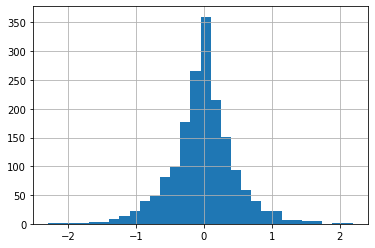

In [90]:
# evaluate the distribution of the errors:
# they should be fairly normally distributed

errors = y_test - rf.predict(X_test)
errors.hist(bins=30)

Conclusion:
Overall, random forest model with the best rmse and r squared values, did the best job in prediction. However, random forest and decision tree tend to overfit the data, while SVR algorithm in this case fit the training set and prediction the test set equallly well, though both slightly lower than what random forest predicts